# Importing Libraries
mplsoccer | numpy | pandas | seaborn | matplotlib
--- | --- | --- | --- | ---
<img src='./images/mpl soccer.png' style='width:100px'> | <img src='./images/numpy.png' style='width:100px'> | <img src='./images/pandas.png' style='width:100px'> | <img src='./images/seaborn.svg' style='width:100px'> | <img src='./images/matplotlib.webp' style='width:100px'>
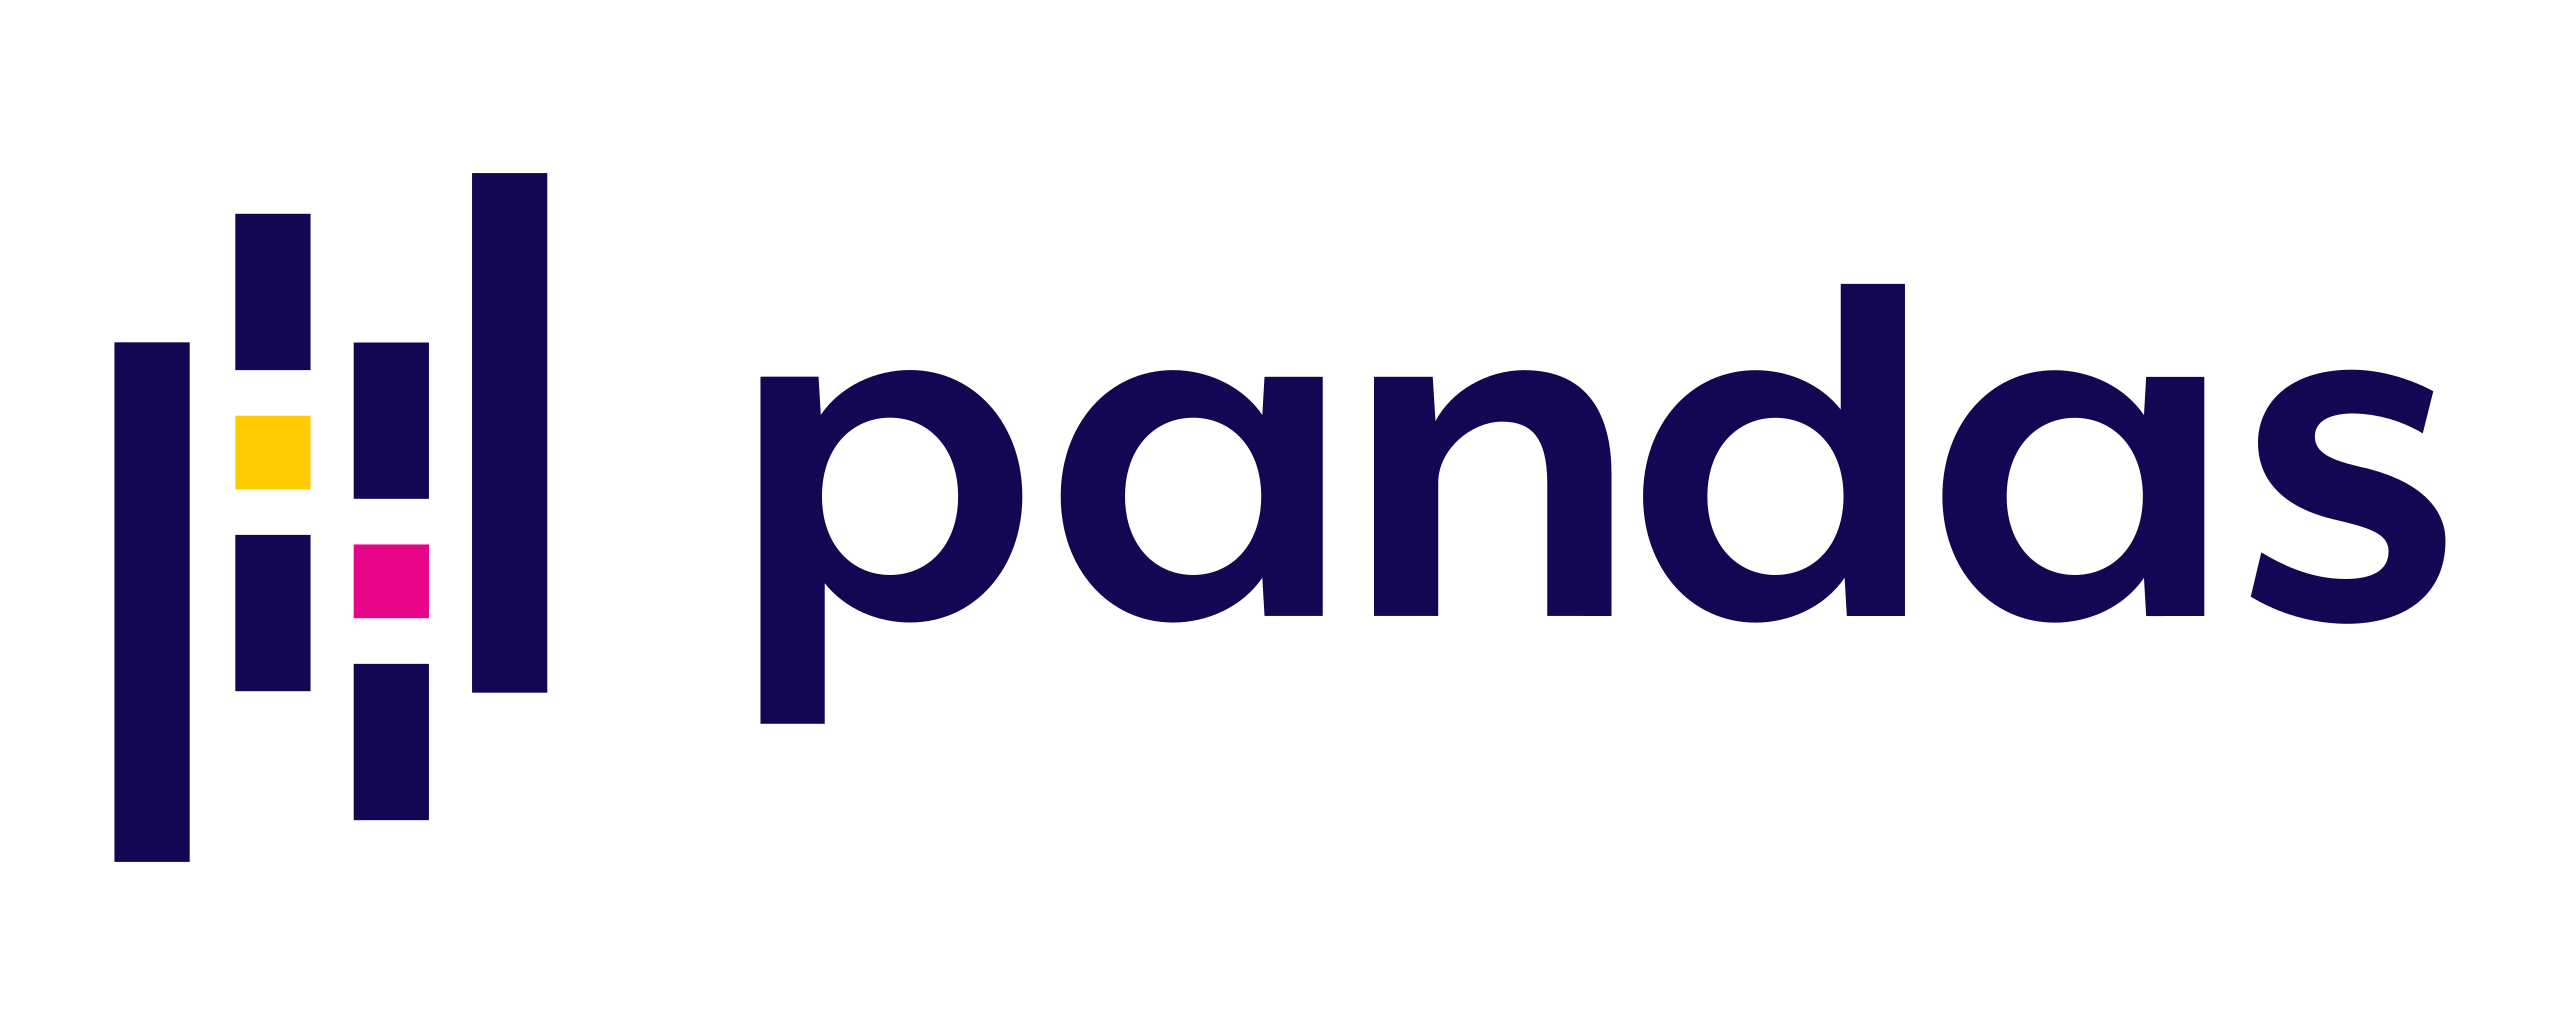
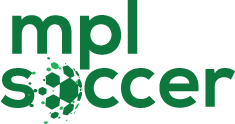
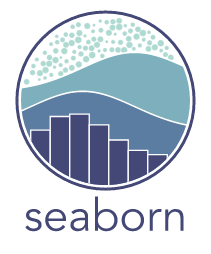
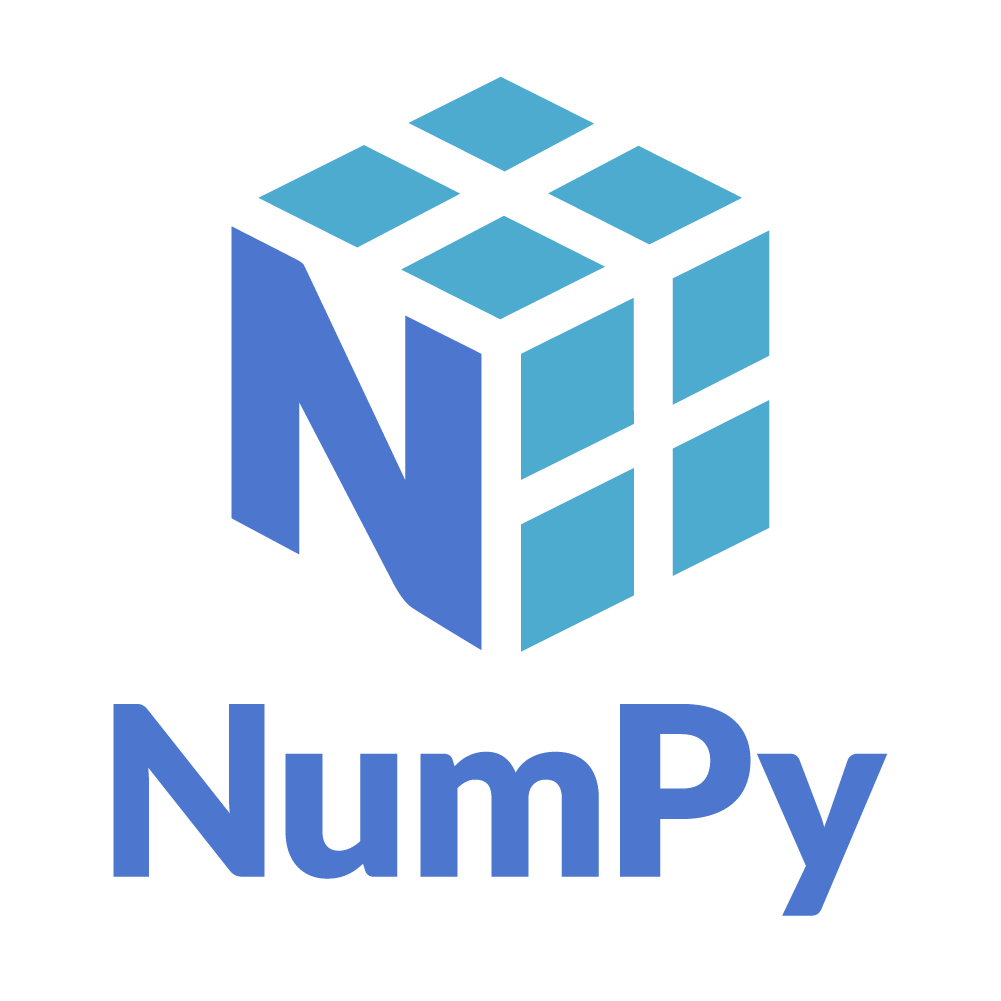
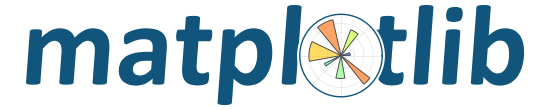

In [1]:
!pip install mplsoccer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mplsoccer import Pitch, Sbopen, VerticalPitch
import os

In [2]:
# importing the data parser through mplsoccer
parser  = Sbopen()

In [3]:
competitions = parser.competition()

competitions.head()

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-08-14T16:57:15.866765,2021-06-13T16:17:31.694,None,2022-08-14T16:57:15.866765
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


## Get competition data and event stats

In [4]:
parser.match(competition_id =16,season_id = 1)

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,18245,2018-05-26,2018-05-26 20:45:00,3,1,available,scheduled,2021-01-23 21:55:30.425330,2021-06-13 16:17:31.694,7,...,26,Final,4222,NSK Olimpiyskyi,238,Ukraine,727,Milorad Mažić,203,Serbia


In [5]:
df, df_related, df_freeze, df_tactics = parser.event(18245)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3497 entries, 0 to 3496
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3497 non-null   object 
 1   index                           3497 non-null   int64  
 2   period                          3497 non-null   int64  
 3   timestamp                       3497 non-null   object 
 4   minute                          3497 non-null   int64  
 5   second                          3497 non-null   int64  
 6   possession                      3497 non-null   int64  
 7   duration                        2519 non-null   float64
 8   match_id                        3497 non-null   int64  
 9   type_id                         3497 non-null   int64  
 10  type_name                       3497 non-null   object 
 11  possession_team_id              3497 non-null   int64  
 12  possession_team_name            34

In [6]:
passes = df.loc[df['type_name'] == 'Pass'].loc[df['sub_type_name'] != 'Throw-in'].set_index('id')

passes.head()

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,pass_miscommunication,shot_one_on_one,block_offensive,shot_redirect,foul_committed_advantage,foul_won_advantage,pass_goal_assist,foul_committed_card_id,foul_committed_card_name,injury_stoppage_in_chain
id,,,,,,,,,,,,,,,,,,,,,
25be91a5-a084-42cb-8cc1-a0fe7b0f52f9,5,1,00:00:00.371000,0,0,2,1.735914,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
b544eb38-7cc9-4cb5-99e9-ebac4fce9eb9,8,1,00:00:03.275000,0,3,2,3.772067,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192c9629-1703-40ab-8498-cab869cf0144,12,1,00:00:08.236000,0,8,3,0.793057,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
599fb72e-8baf-4d5b-815e-7beb8c54e6af,17,1,00:00:10.701000,0,10,3,0.987721,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bea53e5b-5a58-4771-a8a6-8b385a10354a,20,1,00:00:11.728000,0,11,3,0.969765,18245,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['player_name'].value_counts()

Toni Kroos                             263
Marcelo Vieira da Silva Júnior         256
Luka Modrić                            251
Sergio Ramos García                    237
Francisco Román Alarcón Suárez         190
Raphaël Varane                         176
José Ignacio Fernández Iglesias        145
Cristiano Ronaldo dos Santos Aveiro    143
Karim Benzema                          143
Carlos Henrique Casimiro               142
Georginio Wijnaldum                    141
Andrew Robertson                       140
Roberto Firmino Barbosa de Oliveira    138
Sadio Mané                             134
Jordan Brian Henderson                 130
James Philip Milner                    123
Trent Alexander-Arnold                 116
Dejan Lovren                           105
Daniel Carvajal Ramos                   97
Virgil van Dijk                         84
Keylor Navas Gamboa                     69
Loris Karius                            68
Adam David Lallana                      65
Mohamed Sal

In [8]:
df['type_name'].value_counts()

Pass               1033
Ball Receipt        978
Carry               796
Pressure            226
Ball Recovery        95
Duel                 56
Block                36
Clearance            33
Goal Keeper          32
Dribble              29
Shot                 28
Dispossessed         28
Foul Committed       25
Foul Won             23
Dribbled Past        20
Miscontrol           16
Interception         11
Injury Stoppage       9
Substitution          5
Half End              4
Half Start            4
Tactical Shift        3
50/50                 2
Error                 2
Starting XI           2
Offside               1
Name: type_name, dtype: int64

# Renamed the name of players

In [9]:
df['player_name'].unique()

array([nan, 'James Philip Milner', 'Dejan Lovren',
       'Roberto Firmino Barbosa de Oliveira', 'Raphaël Varane',
       'Luka Modrić', 'Sadio Mané', 'Daniel Carvajal Ramos',
       'Carlos Henrique Casimiro', 'Karim Benzema',
       'Jordan Brian Henderson', 'Mohamed Salah',
       'Marcelo Vieira da Silva Júnior', 'Sergio Ramos García',
       'Cristiano Ronaldo dos Santos Aveiro', 'Toni Kroos',
       'Georginio Wijnaldum', 'Trent Alexander-Arnold',
       'Keylor Navas Gamboa', 'Francisco Román Alarcón Suárez',
       'Virgil van Dijk', 'Andrew Robertson', 'Loris Karius',
       'Adam David Lallana', 'José Ignacio Fernández Iglesias',
       'Gareth Frank Bale', 'Emre Can', 'Marco Asensio Willemsen'],
      dtype=object)

In [10]:
# passing player name changes
df['player_name'] = df['player_name'].apply(lambda x: x.replace('James Philip Milner', 'Milner') 
                                            if x == 'James Philip Milner' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Dejan Lovren', 'Lovren') 
                                            if x == 'Dejan Lovren' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Roberto Firmino Barbosa de Oliveira', 'Firmino') 
                                            if x == 'Roberto Firmino Barbosa de Oliveira' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Raphaël Varane', 'Varane') 
                                            if x == 'Raphaël Varane' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Daniel Carvajal Ramos', 'Carvajal') 
                                            if x == 'Daniel Carvajal Ramos' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Carlos Henrique Casimiro', 'Casemiro') 
                                            if x == 'Carlos Henrique Casimiro' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Marcelo Vieira da Silva Júnior', 'Marcelo') 
                                            if x == 'Marcelo Vieira da Silva Júnior' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Luka Modrić', 'Modrić') 
                                            if x == 'Luka Modrić' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Sadio Mané', 'Mané') 
                                            if x == 'Sadio Mané' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Karim Benzema', 'Benzema') 
                                            if x == 'Karim Benzema' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Jordan Brian Henderson', 'Henderson') 
                                            if x == 'Jordan Brian Henderson' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Mohamed Salah', 'Salah') 
                                            if x == 'Mohamed Salah' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Sergio Ramos García', 'Ramos') 
                                            if x == 'Sergio Ramos García' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Toni Kroos', 'Kroos') 
                                            if x == 'Toni Kroos' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Georginio Wijnaldum', 'Wijnaldum') 
                                            if x == 'Georginio Wijnaldum' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Trent Alexander-Arnold', 'Alexander-Arnold') 
                                            if x == 'Trent Alexander-Arnold' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Keylor Navas Gamboa', 'Navas') 
                                            if x == 'Keylor Navas Gamboa' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Virgil van Dijk', 'van Dijk') 
                                            if x == 'Virgil van Dijk' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Andrew Robertson', 'Robertson') 
                                            if x == 'Andrew Robertson' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Andrew Robertson', 'Robertson') 
                                            if x == 'Andrew Robertson' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Loris Karius', 'Karius') 
                                            if x == 'Loris Karius' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Adam David Lallana', 'Lallana') 
                                            if x == 'Adam David Lallana' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('José Ignacio Fernández Iglesias', 'Nacho') 
                                            if x == 'José Ignacio Fernández Iglesias' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Gareth Frank Bale', 'Bale') 
                                            if x == 'Gareth Frank Bale' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Emre Can', 'Emre') 
                                            if x == 'Emre Can' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Francisco Román Alarcón Suárez', 'Isco') 
                                            if x == 'Francisco Román Alarcón Suárez' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Cristiano Ronaldo dos Santos Aveiro', 'Ronaldo') 
                                            if x == 'Cristiano Ronaldo dos Santos Aveiro' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Marco Asensio Willemsen', 'Asensio') 
                                            if x == 'Marco Asensio Willemsen' else x)


# recipient player changes
df['pass_recipient_name'] = df['pass_recipient_name'].apply(lambda x: x.replace('Marcelo Vieira da Silva Júnior', 'Marcelo') 
                                            if x == 'Marcelo Vieira da Silva Júnior' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Dejan Lovren', 'Lovren') 
                                            if x == 'Dejan Lovren' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Roberto Firmino Barbosa de Oliveira', 'Firmino') 
                                            if x == 'Roberto Firmino Barbosa de Oliveira' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Raphaël Varane', 'Varane') 
                                            if x == 'Raphaël Varane' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Daniel Carvajal Ramos', 'Carvajal') 
                                            if x == 'Daniel Carvajal Ramos' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Carlos Henrique Casimiro', 'Casemiro') 
                                            if x == 'Carlos Henrique Casimiro' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Marcelo Vieira da Silva Júnior', 'Marcelo') 
                                            if x == 'Marcelo Vieira da Silva Júnior' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Luka Modrić', 'Modrić') 
                                            if x == 'Luka Modrić' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Sadio Mané', 'Mané') 
                                            if x == 'Sadio Mané' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Karim Benzema', 'Benzema') 
                                            if x == 'Karim Benzema' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Jordan Brian Henderson', 'Henderson') 
                                            if x == 'Jordan Brian Henderson' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Mohamed Salah', 'Salah') 
                                            if x == 'Mohamed Salah' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Sergio Ramos García', 'Ramos') 
                                            if x == 'Sergio Ramos García' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Toni Kroos', 'Kroos') 
                                            if x == 'Toni Kroos' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Georginio Wijnaldum', 'Wijnaldum') 
                                            if x == 'Georginio Wijnaldum' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Trent Alexander-Arnold', 'Alexander-Arnold') 
                                            if x == 'Trent Alexander-Arnold' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Keylor Navas Gamboa', 'Navas') 
                                            if x == 'Keylor Navas Gamboa' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Virgil van Dijk', 'van Dijk') 
                                            if x == 'Virgil van Dijk' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Andrew Robertson', 'Robertson') 
                                            if x == 'Andrew Robertson' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Loris Karius', 'Karius') 
                                            if x == 'Loris Karius' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Adam David Lallana', 'Lallana') 
                                            if x == 'Adam David Lallana' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('José Ignacio Fernández Iglesias', 'Nacho') 
                                            if x == 'José Ignacio Fernández Iglesias' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Gareth Frank Bale', 'Bale') 
                                            if x == 'Gareth Frank Bale' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Emre Can', 'Emre') 
                                            if x == 'Emre Can' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Francisco Román Alarcón Suárez', 'Isco') 
                                            if x == 'Francisco Román Alarcón Suárez' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Cristiano Ronaldo dos Santos Aveiro', 'Ronaldo') 
                                            if x == 'Cristiano Ronaldo dos Santos Aveiro' else x)
df['player_name'] = df['player_name'].apply(lambda x: x.replace('Marco Asensio Willemsen', 'Asensio') 
                                            if x == 'Marco Asensio Willemsen' else x)

In [11]:
df['player_name'].value_counts()

Kroos               263
Marcelo             256
Modrić              251
Ramos               237
Isco                190
Varane              176
Nacho               145
Ronaldo             143
Benzema             143
Casemiro            142
Wijnaldum           141
Robertson           140
Firmino             138
Mané                134
Henderson           130
Milner              123
Alexander-Arnold    116
Lovren              105
Carvajal             97
van Dijk             84
Navas                69
Karius               68
Lallana              65
Salah                59
Bale                 47
Asensio              12
Emre                 10
Name: player_name, dtype: int64

# Pitch map plots - Real Madrid

In [12]:
#check for index of first substitution
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Real Madrid"].iloc[0]["index"]

#successfull passes by Real Madrid until the first substitution
rm_passes = (df.type_name == 'Pass') & (df.team_name == "Real Madrid") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
rm_pass = df.loc[rm_passes, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]

In [13]:
scatter_df = pd.DataFrame()

for i, name in enumerate(rm_pass["player_name"].unique()):
    passx = rm_pass.loc[rm_pass["player_name"] == name]["x"].to_numpy()
    recx = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = rm_pass.loc[rm_pass["player_name"] == name]["y"].to_numpy()
    recy = rm_pass.loc[rm_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = rm_pass.loc[rm_pass["player_name"] == name].count().iloc[0]
    
#size of a circle by amount of passes 
scatter_df['marker_size'] = (scatter_df["no"] / scatter_df["no"].max() * 1500)

In [14]:
#counting passes between players
rm_pass["pair_key"] = rm_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = rm_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)

#setting a threshold
lines_df = lines_df[lines_df['pass_count']>2]

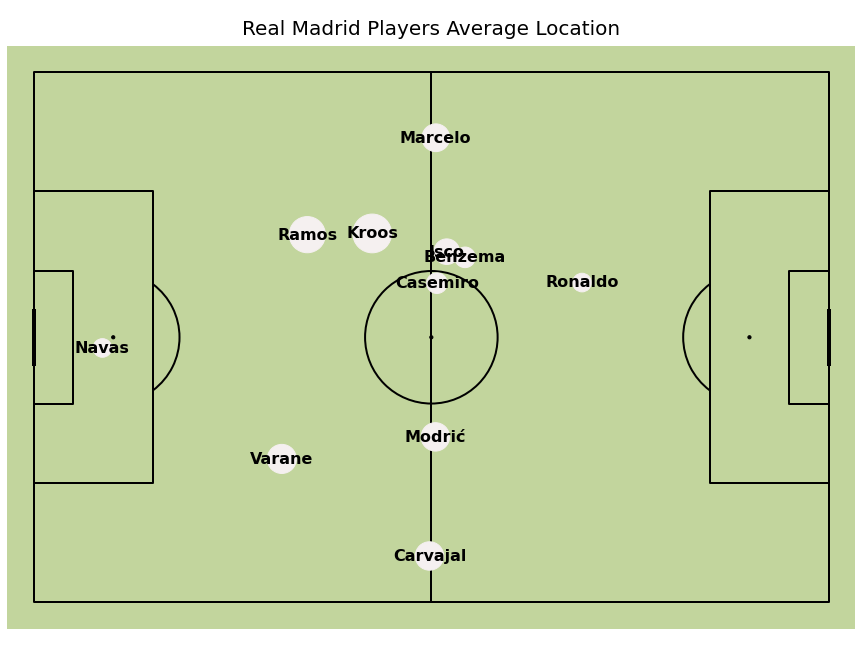

In [15]:
#Drawing pitch
pitch = Pitch(line_color='black',pitch_color='#c2d59d')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='#f5f0f0', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)

#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Real Madrid Players Average Location", fontsize = 20)
plt.show()

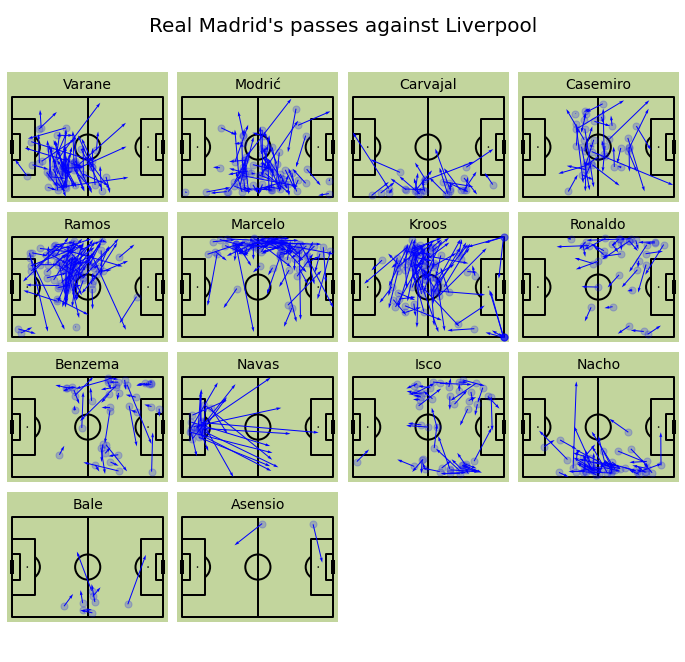

In [16]:
#prepare the dataframe of passes by Real Madrid that were no-throw ins
mask = (df.type_name == 'Pass') & (df.team_name == "Real Madrid") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask, ['x', 'y', 'end_x', 'end_y', 'player_name']]

#get the list of all players who made a pass
names = df_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black', pitch_color='#c2d59d', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "Real Madrid's passes against Liverpool", ha='center', va='center', fontsize=20)
plt.show()

LinAlgError: singular matrix

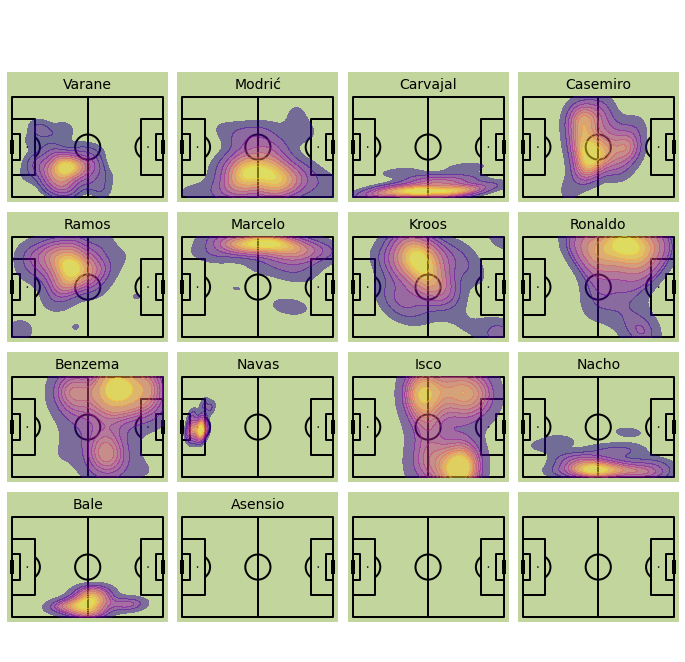

<Figure size 1008x720 with 0 Axes>

In [17]:
#draw 4x4 pitches
pitch = Pitch(line_color='black',pitch_color='#c2d59d',pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,endnote_height=0.04, title_space=0.04, endnote_space=0.01)
plt.figure(figsize=(14,10))

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #Create the heatmap
    pitch.kdeplot(
        x=player_df['x'],
        y=player_df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'plasma',
        ax=ax
    )

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "Real Madrid's passes against Liverpool", ha='center', va='center', fontsize=20)
plt.show()

# Pitch map plots - Liverpool FC

In [18]:
#check for index of first substitution
sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Liverpool"].iloc[0]["index"]

#successfull passes by Real Madrid until the first substitution
lv_passes = (df.type_name == 'Pass') & (df.team_name == "Liverpool") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
lv_pass = df.loc[lv_passes, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]

In [19]:
scatter_df = pd.DataFrame()

for i, name in enumerate(lv_pass["player_name"].unique()):
    passx = lv_pass.loc[lv_pass["player_name"] == name]["x"].to_numpy()
    recx = lv_pass.loc[lv_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
    passy = lv_pass.loc[lv_pass["player_name"] == name]["y"].to_numpy()
    recy = lv_pass.loc[lv_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
    scatter_df.at[i, "player_name"] = name
    #make sure that x and y location for each circle representing the player is the average of passes and receptions
    scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
    scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
    #calculate number of passes
    scatter_df.at[i, "no"] = lv_pass.loc[lv_pass["player_name"] == name].count().iloc[0]
    
#size of a circle by amount of passes 
scatter_df['marker_size'] = (scatter_df["no"] / scatter_df["no"].max() * 1500)

In [20]:
#counting passes between players
lv_pass["pair_key"] = lv_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
lines_df = lv_pass.groupby(["pair_key"]).x.count().reset_index()
lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)

#setting a threshold
lines_df = lines_df[lines_df['pass_count']>2]

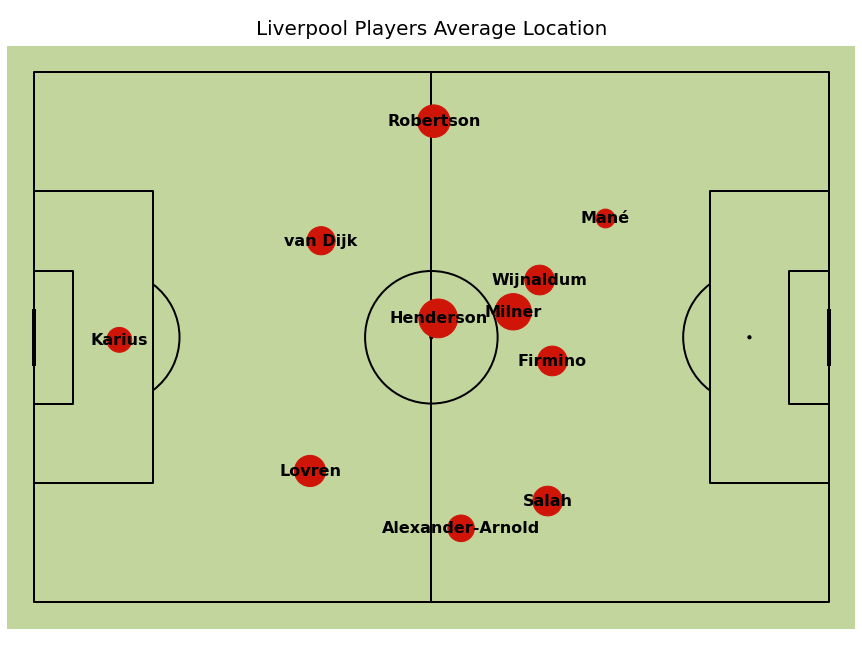

In [21]:
#Drawing pitch
pitch = Pitch(line_color='black',pitch_color='#c2d59d')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#Scatter the location on the pitch
pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='#cf1508', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)

#annotating player name
for i, row in scatter_df.iterrows():
    pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)

fig.suptitle("Liverpool Players Average Location", fontsize = 20)
plt.show()

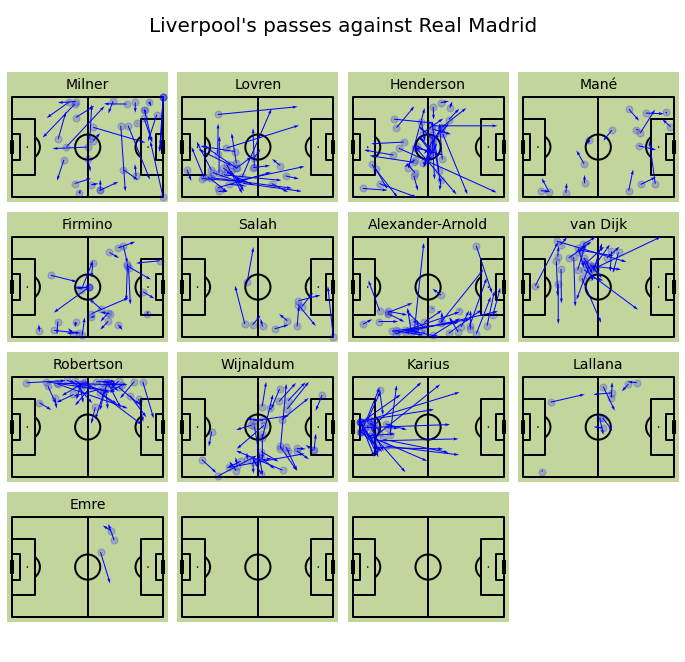

In [22]:
#prepare the dataframe of passes by Liverpool that were no-throw ins
mask = (df.type_name == 'Pass') & (df.team_name == "Liverpool") & (df.sub_type_name != "Throw-in")
df_passes = df.loc[mask, ['x', 'y', 'end_x', 'end_y', 'player_name']]

#get the list of all players who made a pass
names = df_passes['player_name'].unique()

#draw 4x4 pitches
pitch = Pitch(line_color='black', pitch_color='#c2d59d', pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0.04, endnote_space=0.01)

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,
            ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #scatter
    pitch.scatter(player_df.x, player_df.y, alpha = 0.2, s = 50, color = "blue", ax=ax)
    #plot arrow
    pitch.arrows(player_df.x, player_df.y,
            player_df.end_x, player_df.end_y, color = "blue", ax=ax, width=1)

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "Liverpool's passes against Real Madrid", ha='center', va='center', fontsize=20)
plt.show()

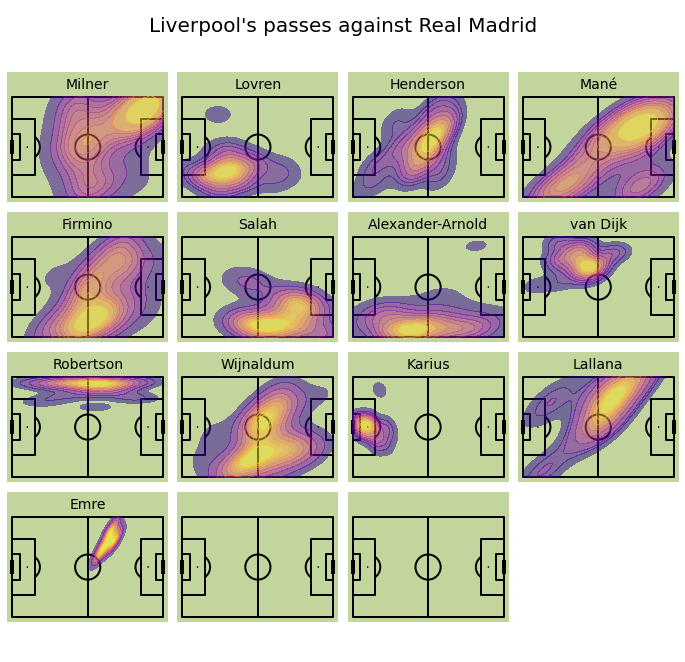

<Figure size 1008x720 with 0 Axes>

In [23]:
#draw 4x4 pitches
pitch = Pitch(line_color='black',pitch_color='#c2d59d',pad_top=20)
fig, axs = pitch.grid(ncols = 4, nrows = 4, grid_height=0.85, title_height=0.06, axis=False,endnote_height=0.04, title_space=0.04, endnote_space=0.01)
plt.figure(figsize=(14,10))

#for each player
for name, ax in zip(names, axs['pitch'].flat[:len(names)]):
    #put player name over the plot
    ax.text(60, -10, name,ha='center', va='center', fontsize=14)
    #take only passes by this player
    player_df = df_passes.loc[df_passes["player_name"] == name]
    #Create the heatmap
    pitch.kdeplot(
        x=player_df['x'],
        y=player_df['y'],
        shade = True,
        shade_lowest=False,
        alpha=.5,
        n_levels=10,
        cmap = 'plasma',
        ax=ax
    )

#We have more than enough pitches - remove them
for ax in axs['pitch'][-1, 16 - len(names):]:
    ax.remove()

#Another way to set title using mplsoccer
axs['title'].text(0.5, 0.5, "Liverpool's passes against Real Madrid", ha='center', va='center', fontsize=20)
plt.show()